### Comparing Lighkurve PLD to EVERESTv2.0 PLD applied to K2 campaign 8 AGN
21 March 2019

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import lightkurve as lk
from lightkurve.correctors import PLDCorrector
import everest 

import logging
#logging.getLogger("everest").setLevel(logging.WARNING)
#logger = logging.getLogger('everest')
#logger=False
#everest.utils.logger=False

logging.getLogger().setLevel(logging.WARNING) # trying to get rid of all these DEBUG messages (it isn't working)
logging.getLogger("matplotlib").setLevel(logging.WARNING)
logging.getLogger("urllib3").setLevel(logging.WARNING)

---
## AGN \# 1
Has a notable m-shape like some of the Ed shaya galaxies

In [2]:
epic = 220179771
campaign = 8 

In [3]:
lc_everest = everest.Everest(epic)
#everest.Search(epic)

INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 220179771.


In [4]:
tpf = lk.search_targetpixelfile(epic, campaign=campaign).download() # define tpf

# get raw lightcurve
lc = tpf.to_lightcurve(aperture_mask='all')
_, spurious_cadences = lc.flatten().remove_outliers(return_mask=True) # remove spurious cadences
lc_raw = lc[~spurious_cadences]

DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): mast.stsci.edu:443
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /portal/Mashup/Mashup.asmx/columnsconfig HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /portal/Mashup/Mashup.asmx/columnsconfig HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "GET /api/v0/download/file?uri=mast:K2/url/missions/k2/target_pixel_files/c8/220100000/79000/ktwo220179771-c08_lpd-targ.fits.gz HTTP/1.1" 200 4766136
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220179771-c08_lc/ktwo220179771-c08_lpd-targ.fits.gz with expec

258 cadences will be ignored (bitmask=1130799)


INFO  [lightkurve.utils.create_quality_mask()]: 258 cadences will be ignored (bitmask=1130799)


In [5]:
# get PLD corrected (lightkurve)
pld = PLDCorrector(tpf)# instantiate pld corrector
lc_pld = pld.correct()# correct with 2nd order pld
lc_pld = lc_pld[~spurious_cadences]# remove spurious cadences

Text(0.5, 1.0, 'Lightcurve PLD')

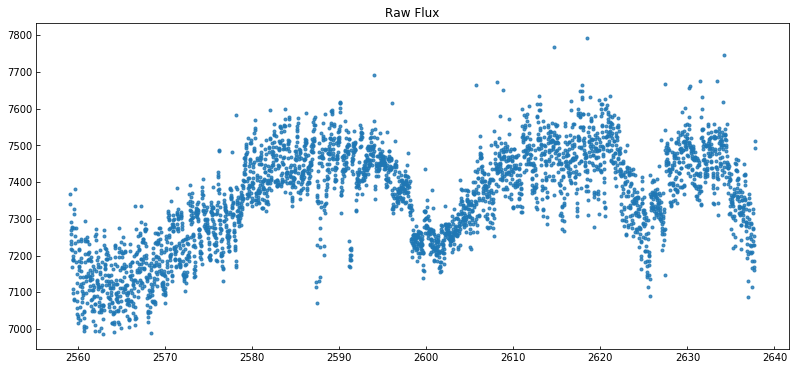

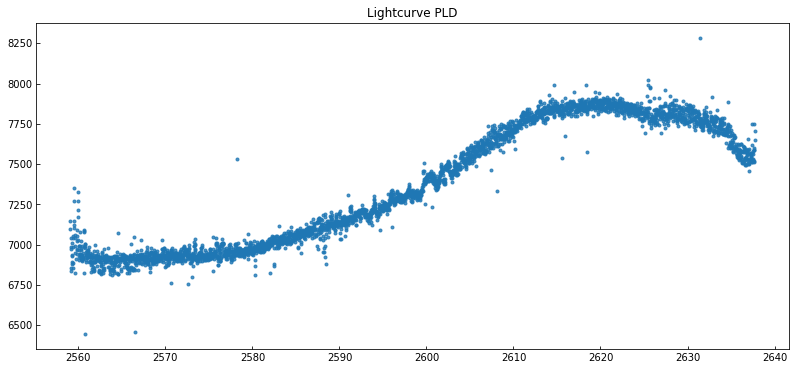

In [6]:
#lc_raw.plot(marker='.', ls=' ')
plt.figure(figsize=(13.5,6))
plt.plot(lc_raw.time, lc_raw.flux, '.', alpha = 0.8)
plt.title("Raw Flux")

# lightkurve PLD corrected
#lc_pld.plot(marker='.', ls=' ')

plt.figure(figsize=(13.5,6))
plt.plot(lc_pld.time, lc_pld.flux, '.', alpha = 0.8)
plt.title("Lightcurve PLD")

INFO  [everest.user.plot()]: Plotting the light curve...


/home/rachel/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/rachel/anaconda2/envs/py3/lib/python3.6/site-packages/everest/user.py:791: RuntimeWarning: invalid value encountered in less
  for i in np.where(flux < ylim[0])[0]:
/home/rachel/anaconda2/envs/py3/lib/python3.6/site-packages/everest/user.py:807: RuntimeWarning: invalid value encountered in greater
  for i in np.where(flux > ylim[1])[0]:


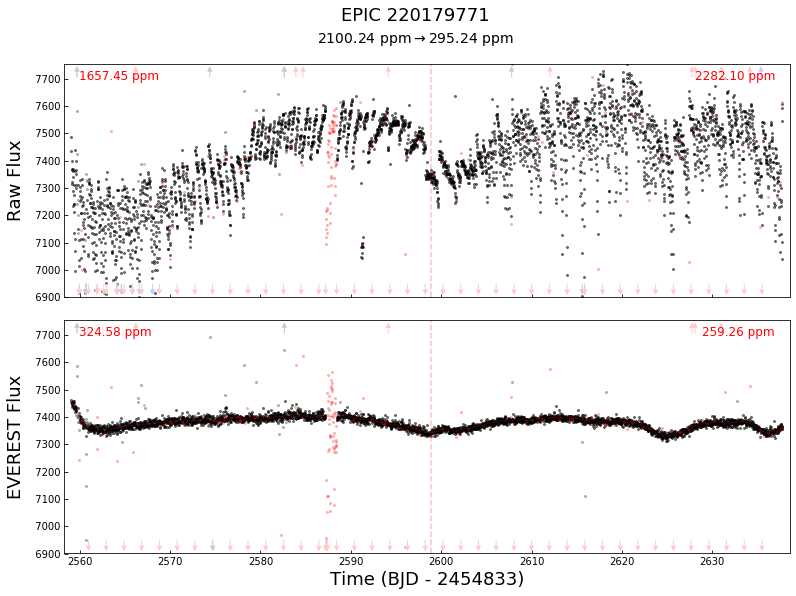

In [7]:
# everest pipeline
_ = lc_everest.plot()

---
## AGN \#2
Has single "hump" in the middle of the campaign 

In [8]:
epic = 220444932
campaign = 8 

In [9]:
lc_everest = everest.Everest(epic)

INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 220444932.


In [10]:
tpf = lk.search_targetpixelfile(epic, campaign=campaign).download() # define tpf

# get raw lightcurve
lc = tpf.to_lightcurve(aperture_mask='all')
_, spurious_cadences = lc.flatten().remove_outliers(return_mask=True) # remove spurious cadences
lc_raw = lc[~spurious_cadences]

DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (2): mast.stsci.edu:443
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "GET /api/v0/download/file?uri=mast:K2/url/missions/k2/target_pixel_files/c8/220400000/44000/ktwo220444932-c08_lpd-targ.fits.gz HTTP/1.1" 200 2536130
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220444932-c08_lc/ktwo220444932-c08_lpd-targ.fits.gz with expected size 2536130.


258 cadences will be ignored (bitmask=1130799)


INFO  [lightkurve.utils.create_quality_mask()]: 258 cadences will be ignored (bitmask=1130799)


In [11]:
# get PLD corrected (lightkurve)
pld = PLDCorrector(tpf)# instantiate pld corrector
lc_pld = pld.correct()# correct with 2nd order pld
lc_pld = lc_pld[~spurious_cadences]# remove spurious cadences

Text(0.5, 1.0, 'Lightcurve PLD')

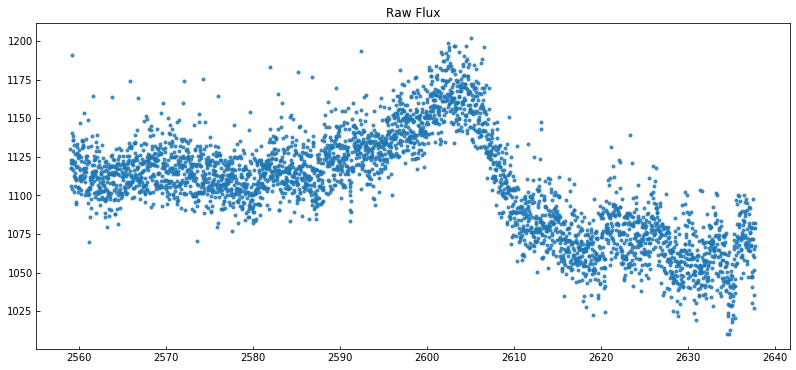

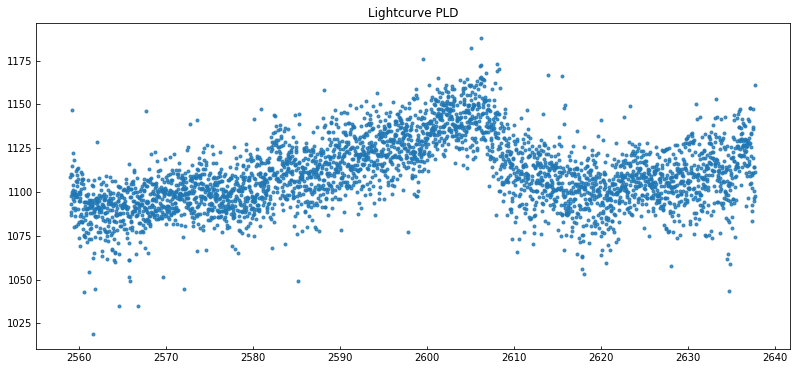

In [12]:
#lc_raw.plot(marker='.', ls=' ')
plt.figure(figsize=(13.5,6))
plt.plot(lc_raw.time, lc_raw.flux, '.', alpha = 0.8)
plt.title("Raw Flux")

#lc_pld.plot(marker='.', ls=' ')
plt.figure(figsize=(13.5,6))
plt.plot(lc_pld.time, lc_pld.flux, '.', alpha = 0.8)
plt.title("Lightcurve PLD")

INFO  [everest.user.plot()]: Plotting the light curve...


/home/rachel/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/rachel/anaconda2/envs/py3/lib/python3.6/site-packages/everest/user.py:791: RuntimeWarning: invalid value encountered in less
  for i in np.where(flux < ylim[0])[0]:
/home/rachel/anaconda2/envs/py3/lib/python3.6/site-packages/everest/user.py:807: RuntimeWarning: invalid value encountered in greater
  for i in np.where(flux > ylim[1])[0]:


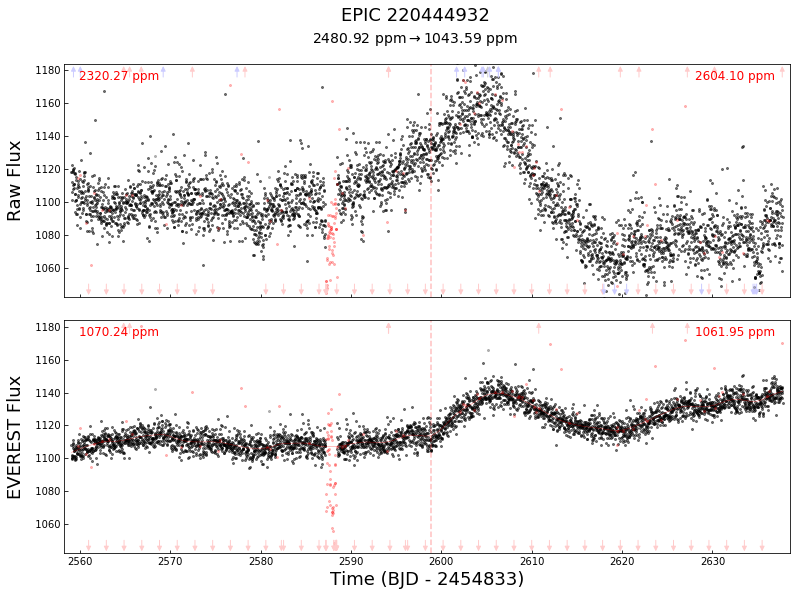

In [13]:
_ = lc_everest.plot()

---
## AGN \#3
Has bad arc drift in light curve

In [14]:
epic = 220226374
campaign = 8 

In [15]:
lc_everest = everest.Everest(epic)

INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 220226374.


In [16]:
tpf = lk.search_targetpixelfile(epic, campaign=campaign).download() # define tpf

# get raw lightcurve
lc = tpf.to_lightcurve(aperture_mask='all')
_, spurious_cadences = lc.flatten().remove_outliers(return_mask=True) # remove spurious cadences
lc_raw = lc[~spurious_cadences]

DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (3): mast.stsci.edu:443
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "GET /api/v0/download/file?uri=mast:K2/url/missions/k2/target_pixel_files/c8/220200000/26000/ktwo220226374-c08_lpd-targ.fits.gz HTTP/1.1" 200 3462009
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220226374-c08_lc/ktwo220226374-c08_lpd-targ.fits.gz with expected size 3462009.


258 cadences will be ignored (bitmask=1130799)


INFO  [lightkurve.utils.create_quality_mask()]: 258 cadences will be ignored (bitmask=1130799)


In [17]:
# get PLD corrected (lightkurve)
pld = PLDCorrector(tpf)# instantiate pld corrector
lc_pld = pld.correct()# correct with 2nd order pld
lc_pld = lc_pld[~spurious_cadences]# remove spurious cadences

Text(0.5, 1.0, 'Lightcurve PLD')

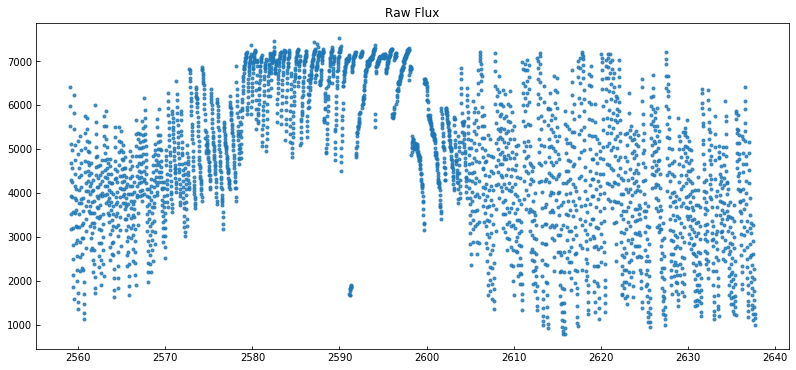

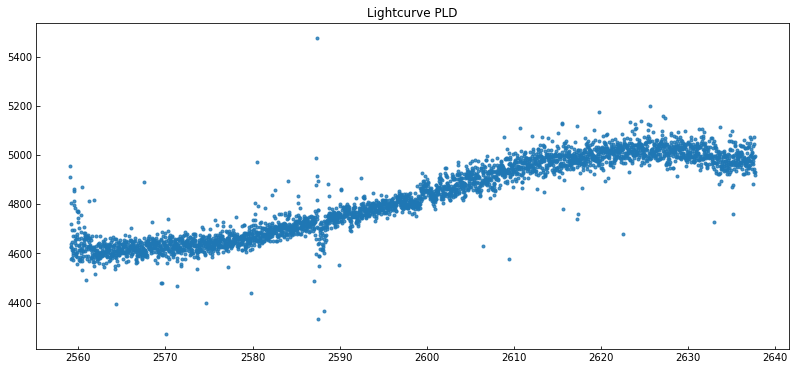

In [18]:
#lc_raw.plot(marker='.', ls=' ')
plt.figure(figsize=(13.5,6))
plt.plot(lc_raw.time, lc_raw.flux, '.', alpha = 0.8)
plt.title("Raw Flux")

#lc_pld.plot(marker='.', ls=' ')
plt.figure(figsize=(13.5,6))
plt.plot(lc_pld.time, lc_pld.flux, '.', alpha = 0.8)
plt.title("Lightcurve PLD")

INFO  [everest.user.plot()]: Plotting the light curve...


/home/rachel/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/rachel/anaconda2/envs/py3/lib/python3.6/site-packages/everest/user.py:791: RuntimeWarning: invalid value encountered in less
  for i in np.where(flux < ylim[0])[0]:
/home/rachel/anaconda2/envs/py3/lib/python3.6/site-packages/everest/user.py:807: RuntimeWarning: invalid value encountered in greater
  for i in np.where(flux > ylim[1])[0]:


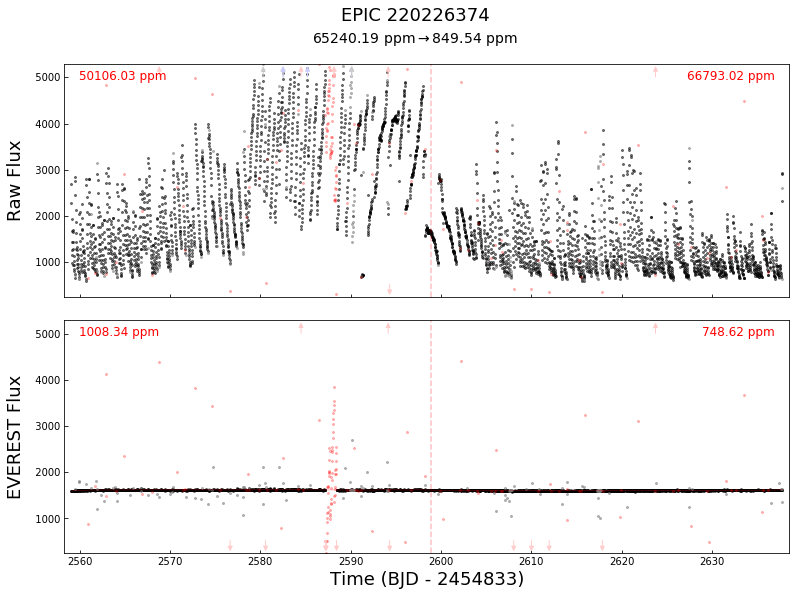

In [19]:
_ = lc_everest.plot()

---
The PSDs for the above first and third objects look mostly flat. Couldn't calculate the PSD for the middle one for some reason...

Some other AGN to look at: 220250435 (PSD looks right), 220343599 (PSD looks flat), 220171966 (PSD looks flat), 220452157 (PSD looks mostly flat)

In [2]:
# do qucik PSD

# functions defined here!
from astropy.stats import LombScargle

def LS_PSD(t,y, f=None):
    """
    Normalized Lomb Scargle Power Spectrum Density
    
    args
        t: time array
        y: flux array 
        
        f(optional): frequency range
    
    returns
        f: frequency range with first and last entry removed
        power_ls: lomb-scargle power
    
    """
    N = len(t) # number of datapoints    
    #f = np.fft.rfftfreq(N**2, (t[-1] - t[0])) # frequency range (from Uttley et al. 2002)
    if f is None:
        f = np.fft.rfftfreq(N, (t[1] - t[0])) # frequency range

    # Compute the LS based power spectrum estimates
    model = LombScargle(t, y)
    power_ls = model.power(f[1:-1], method="fast", normalization="psd")

    # >>> To get the LS based PSD in the correct units, normalize by N <<<
    power_ls /= N
    
    return f[1:-1], power_ls

def plot_lc_PSD(time, flux, ax1,ax2,l="", f=None, **kwargs):
    """
    Plots lightcurve and PSD in ax1 and ax2 respectively
    
    args
        time: time array
        flux: flux array
        ax1: matplotlib axis (subplot) for flux v. time
        ax2: matplotlib axis (subplot) for power v. freq
        l: (optional) label for input data (e.g. raw, corrected)
    
    """
    
    # sec = days*86400
    f,power = LS_PSD(time*86400,flux, f=f)
    #f,power = powerSpectrum(time,flux)
    
    ax1.plot(time,flux, label=l+" light curve", **kwargs)
    ax1.set_xlabel("Time - 2454833[BKJD days]")
    ax1.set_ylabel("Flux")
    ax1.legend()
    
    ax2.plot(f,power, label=l+" PSD", **kwargs)
    ax2.set_xlabel("frequency [Hz]")
    ax2.set_ylabel("power [$\mathrm{ppm}^2/\mathrm{Hz}$]")
    ax2.set_yscale("log")
    ax2.set_xscale("log")  
    ax2.legend()

In [3]:
# 80 day campaigns, 30 min between cadences (N data points  = 80*12*2)
freq = np.fft.rfftfreq(80*12*2, 30.0*60)

INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 220179771.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220444932-c08_lc/ktwo220444932-c08_lpd-targ.fits.gz with expected size 2536130.


258 cadences will be ignored (bitmask=1130799)


INFO  [lightkurve.utils.create_quality_mask()]: 258 cadences will be ignored (bitmask=1130799)
INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 220444932.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220226374-c08_lc/ktwo220226374-c08_lpd-targ.fits.gz with expected size 3462009.


258 cadences will be ignored (bitmask=1130799)


INFO  [lightkurve.utils.create_quality_mask()]: 258 cadences will be ignored (bitmask=1130799)
INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 220226374.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220250435-c08_lc/ktwo220250435-c08_lpd-targ.fits.gz with expected size 4096543.


258 cadences will be ignored (bitmask=1130799)


INFO  [lightkurve.utils.create_quality_mask()]: 258 cadences will be ignored (bitmask=1130799)
INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 220250435.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220343599-c08_lc/ktwo220343599-c08_lpd-targ.fits.gz with expected size 4821132.


258 cadences will be ignored (bitmask=1130799)


INFO  [lightkurve.utils.create_quality_mask()]: 258 cadences will be ignored (bitmask=1130799)
INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 220343599.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220171966-c08_lc/ktwo220171966-c08_lpd-targ.fits.gz with expected size 3715943.


258 cadences will be ignored (bitmask=1130799)


INFO  [lightkurve.utils.create_quality_mask()]: 258 cadences will be ignored (bitmask=1130799)
INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 220171966.
INFO  [astropy._download_file()]: Found cached file /home/rachel/.lightkurve-cache/mastDownload/K2/ktwo220452157-c08_lc/ktwo220452157-c08_lpd-targ.fits.gz with expected size 2501434.


258 cadences will be ignored (bitmask=1130799)


INFO  [lightkurve.utils.create_quality_mask()]: 258 cadences will be ignored (bitmask=1130799)
INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 220452157.


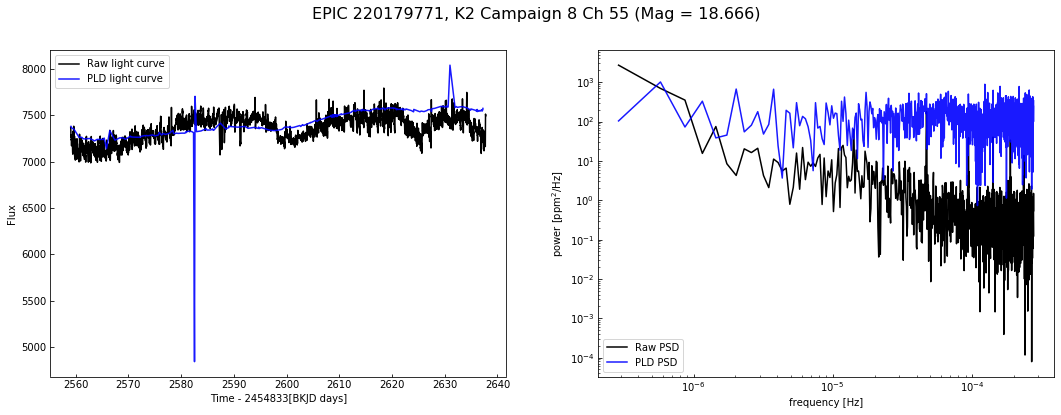

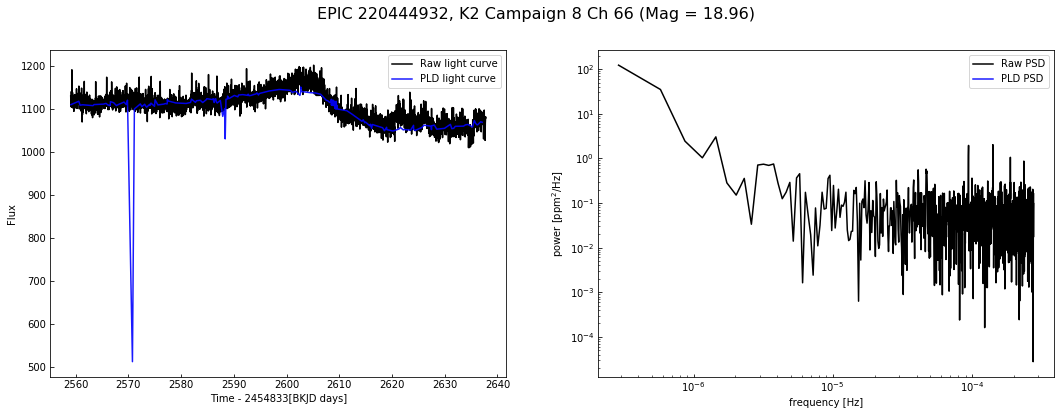

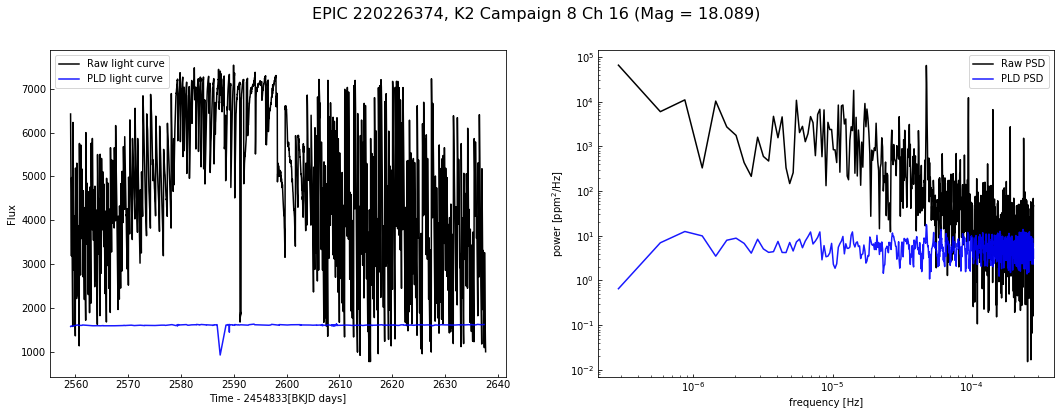

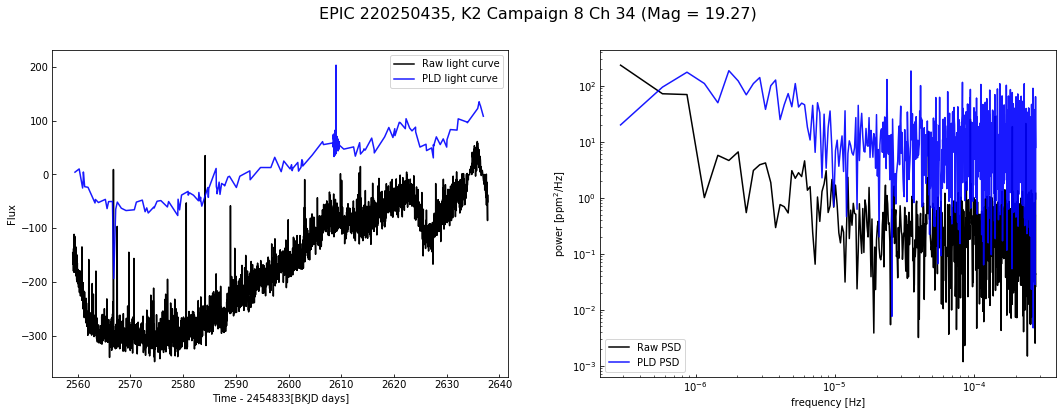

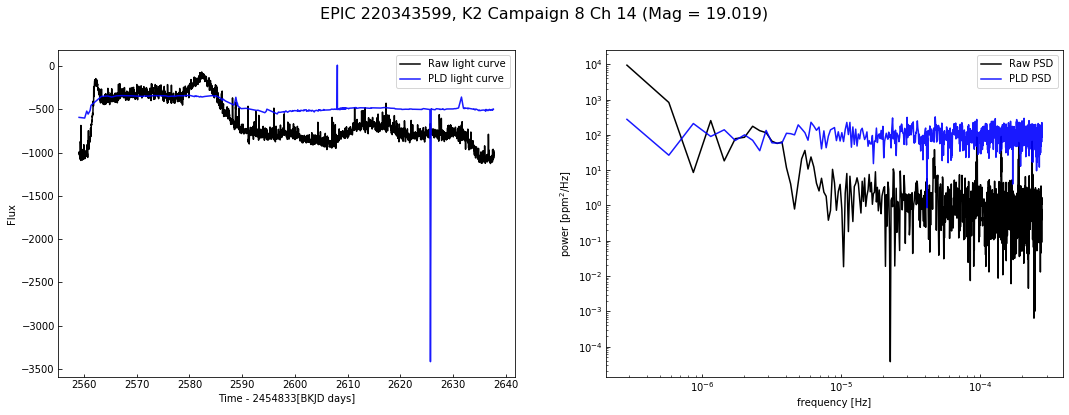

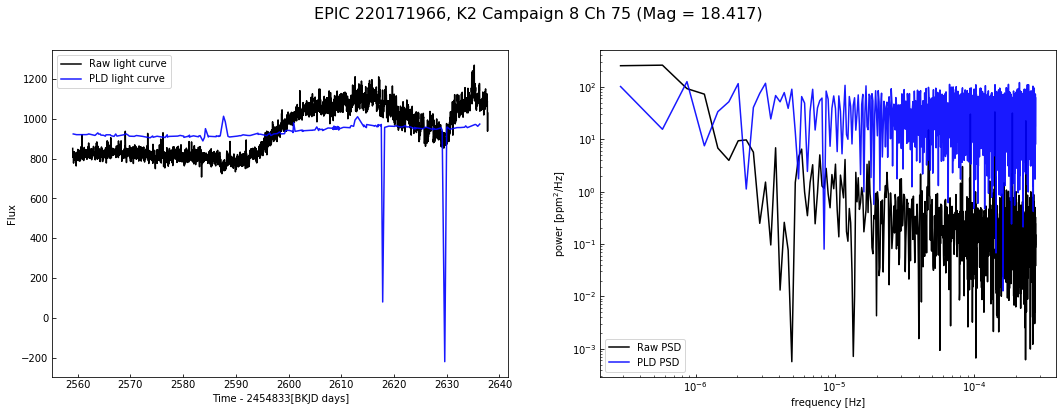

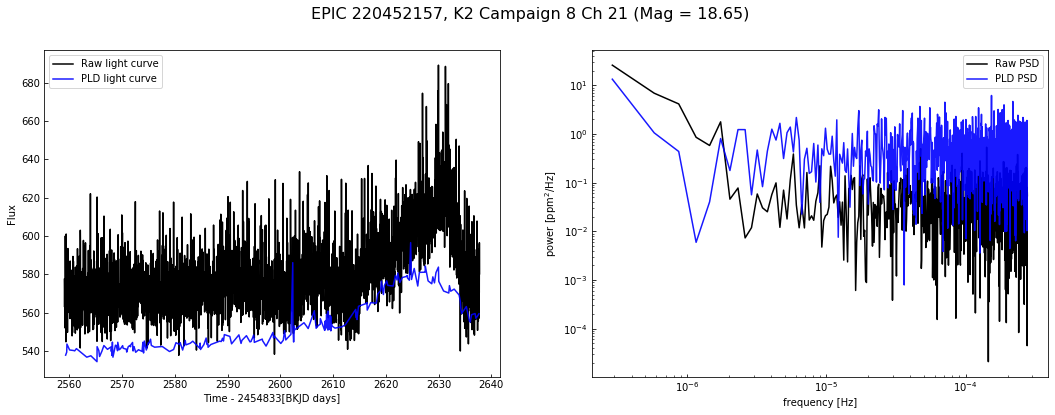

In [4]:
epics = [220179771, 220444932, 220226374,  220250435, 220343599, 220171966, 220452157]
campaign = 8

for epic in epics:
    tpf = lk.search_targetpixelfile(epic, campaign=campaign).download() # define tpf
    channel = tpf.channel
    kepmag = tpf.hdu[0].header['KEPMAG']# getting magnitude
    
    # get raw lightcurve
    lc = tpf.to_lightcurve(aperture_mask='all')
    _, spurious_cadences = lc.flatten().remove_outliers(return_mask=True) # remove spurious cadences
    lc_raw = lc[~spurious_cadences]

    # get PLD corrected (everest 2.0)
    lc_everest = everest.Everest(epic)
    sorting = np.array(lc_everest.time[~lc_everest.mask]).argsort()
    lc_eve_time = lc_everest.time[~lc_everest.mask][sorting]
    lc_eve_flux = lc_everest.flux[~lc_everest.mask][sorting]
    
    # plot them
    fig, ax = plt.subplots(1,2, figsize=(18,6))
    plot_lc_PSD(lc_raw.time, lc_raw.flux, ax[0], ax[1], l="Raw", f=freq, color='k', alpha=1.0)
    plot_lc_PSD( lc_eve_time, lc_eve_flux, ax[0], ax[1], l="PLD", f=freq, color='b', alpha=0.9)
    fig.suptitle("EPIC %s, K2 Campaign %s Ch %s (Mag = %s)"%(epic,campaign,channel,kepmag), fontsize=16)
    plt.savefig("/home/rachel/Research/K2/submit/c8_%s.png"%epic)

These seem to still have spurious cadences and don't exactly look like a DRW.

---
